In [1]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient



In [3]:
#Local variables: figure out how to automate.
JobIDint = 7438087
JOBID = str(JobIDint)
tree_sizes_1 = list(range(10,605,5))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600]


In [4]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/mchari/bird/Parallel_Hoffman_full/' + JOBID + '_output_files'
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

transfer is done


In [8]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

In [ ]:
#for some reason, only went until 430 

In [37]:
print(target_directory)
#look at one mpd randomization from one trial to see sample data structure. 
target_file_get = target_directory +  "100_3992out.csv"
print(target_file_get)
df = pd.read_csv(target_file_get)
df.index =['pd', 'mpd', "mntd"]
print(df)
#df.iloc[0]['mpd.rnd']

stat_temp = df.loc['mpd']
print(stat_temp)


/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/7346854_output_files/
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/7346854_output_files/100_3992out.csv
           trial     trial.1     trial.2     trial.3     trial.4
pd    489.262441  519.645144  437.474465  464.035728  432.295552
mpd    88.241526   81.519488   80.919770   79.850588   82.348477
mntd   27.043924   20.634463   25.568045   25.102002   23.103256
trial      88.241526
trial.1    81.519488
trial.2    80.919770
trial.3    79.850588
trial.4    82.348477
Name: mpd, dtype: float64


In [5]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [9]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [10]:
#TODO: write this to a csv somehow so I can delete that massive file. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [11]:
#
new_mpd = new_mpd_smallvals
new_mntd = new_mntd_smallvals
new_pd = new_pd_smallvals

print(new_mpd)

{'mpd10': [95.3897497555556, 90.1901571777778, 110.129961311111, 90.7941874666667, 100.896654111111, 115.402282711111, 101.875759022222, 94.8719926, 104.995813911111, 100.969451377778, 110.804099244444, 106.149582977778, 109.290560577778, 101.111609911111, 98.6564086, 102.2141632, 103.758282, 113.564129244444, 116.711646488889, 95.5113367333333, 112.324028044444, 98.3662751111111, 106.296449155556, 104.918850377778, 110.414246822222, 99.8074036888889, 108.271737222222, 97.9791134888889, 81.3914011777778, 114.925783111111, 115.338224733333, 80.5909210888889, 83.9638692444445, 94.5862929777778, 108.366189577778, 91.2616835111111, 109.164840911111, 99.2550269777778, 98.0538805333333, 98.2664551555556, 107.607280355556, 101.548813777778, 109.816647688889, 97.6311016444444, 95.3691541555555, 84.3200290222222, 96.7654632444444, 88.5844553333333, 96.0980006, 82.4868961555556, 105.0786348, 78.0239175555556, 99.5568186666667, 107.369618711111, 116.548061844444, 91.1886751777778, 79.928419644444

In [23]:
data = mpd['mpd10']
plt.hist(data, bins =30)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



NameError: name 'mpd' is not defined

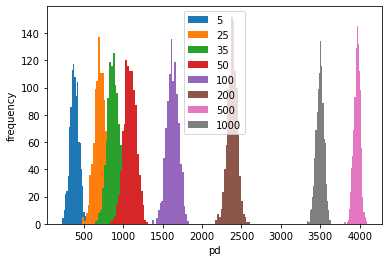

In [90]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_pd['pd10'],bins = 20)
#plt.hist(new_mpd['mpd10'],bins = 20)
#plt.hist(new_mpd['mpd15'],bins = 20)
#plt.hist(new_mpd['mpd20'],bins = 20)
plt.hist(new_pd['pd25'],bins = 20)
#plt.hist(new_mpd['mpd30'],bins = 20)
plt.hist(new_pd['pd35'],bins = 20)
#plt.hist(new_mpd['mpd40'],bins = 20)
#plt.hist(new_mpd['mpd45'],bins = 20)
plt.hist(new_pd['pd50'],bins = 20)
plt.hist(new_pd['pd100'],bins = 20)
plt.hist(new_pd['pd200'],bins = 20)
plt.hist(new_pd['pd500'],bins = 20)
plt.hist(new_pd['pd400'],bins = 20)
#plt.hist(new_mpd['mpd50'])
#plt.hist(new_mpd['mpd100'])
#plt.hist(new_mpd['mpd1000'])
#plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("5","25",  "35", "50", "100", "200", "500", "1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

In [18]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

([85.4053475681326, 84.89264183573503, 86.35283441945755, 85.87928658886695, 86.73678323590559, 86.4449177873035, 85.92442180427618, 86.04153561177552, 85.83281997879982, 86.65991576783155, 85.9249589042827, 85.97720905456984, 86.34885027380639, 86.65196301533389, 86.17000909378581, 86.70342713444636, 86.66090537534221, 86.5315272249308, 86.40683552873661, 86.16134099793767, 86.41770905277846, 86.30276009941564, 86.48845342982929, 86.68000624736686, 86.56475769501318, 86.55768685721374, 86.42942739921986, 86.22751413608884, 86.21575722156938, 86.36888914257496, 86.65549916889768, 86.49619990262872, 86.22980853701964, 86.38120706552019, 86.57340455265515, 86.3488253289758, 86.32658809846325, 86.43320320747767, 86.27119318300676, 86.4411275681841, 86.39898338874703, 86.60341547174306, 86.77125838547504, 86.59037796321715, 86.74442177175514, 86.50080432236761, 86.45995752666705, 86.48110589669196, 86.43648298520546, 86.6241961432584, 86.46709259776593, 86.68959020284862, 86.54674601996342

In [12]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [13]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

mpd10
116.17012262888927
mpd15
113.42963597428563
mpd20
112.3822948115789
mpd25
110.28092873900016
mpd30
109.7519878289081
mpd35
108.9574791316805
mpd40
108.7222441904165
mpd45
108.25655372030307
mpd50
107.55583082032682
mpd55
107.1331981767005
mpd60
106.69026315225977
mpd65
107.0039011721636
mpd70
107.08658159170801
mpd75
106.04899943181945
mpd80
106.36422556791902
mpd85
106.32607899745112
mpd90
105.98239148828932
mpd95
105.73260126853279
mpd100
105.58717307476735
mpd105
105.14529261594326
mpd110
105.27840231125917
mpd115
105.0184386355986
mpd120
105.10281927366233
mpd125
104.71688894132883
mpd130
104.8713713865115
mpd135
104.64543600027108
mpd140
104.69349462395672
mpd145
104.61841449781137
mpd150
104.25714011518144
mpd155
104.29989215119824
mpd160
104.33056263943777
mpd165
104.54792962401662
mpd170
104.37245782953354
mpd175
104.03978034791488
mpd180
103.91864511597167
mpd185
104.04201368379873
mpd190
103.60614503570434
mpd195
103.84685940370068
mpd200
103.44852854166562
mpd205
103.5

In [54]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

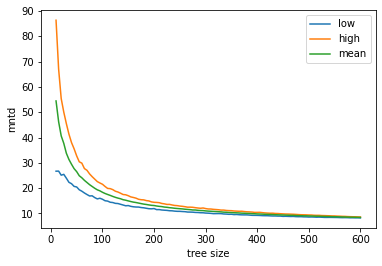

In [14]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig('mntd_95CI_bird.jpg', dpi=300)



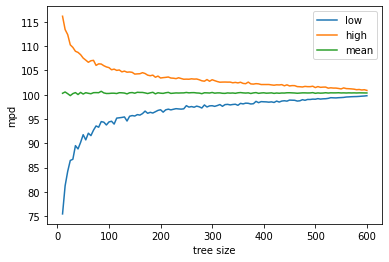

In [15]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('mpd_95CI_bird.jpg', dpi=300)



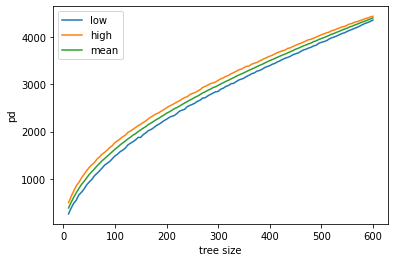

In [16]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.legend(labels2)
plt.savefig('pd_95CI_bird.jpg', dpi=1200)

In [17]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv("CI_mpd_output_bootstrap_bird.csv")


In [18]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv("CI_mntd_output_bootstrap_bird.csv")

In [19]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv("CI_pd_output_bootstrap_bird.csv")